In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Dataset Description

The dataset contains observational data related to sleep patterns and cognitive performance metrics. It enables the quantitative investigation of how sleep deprivation impacts reaction time and overall cognitive functioning.

In [42]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/sleep_deprivation_dataset_detailed.csv")
df.head(25)

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14
5,P6,3.94,12,6,2.84,58.80,46,224.48,28,Male,32.23,3,6,29
6,P7,3.35,8,18,3.16,50.90,31,201.56,22,Male,32.74,4,5,16
7,P8,8.20,14,21,3.28,74.69,66,388.37,29,Male,32.25,1,0,4
8,P9,6.61,12,1,1.74,58.94,38,258.28,20,Female,25.24,3,4,28
9,P10,7.25,0,9,2.61,68.32,23,221.28,18,Male,21.78,3,4,3


## 2. Problem Definition

Sleep deprivation has been consistently associated with impairments in attention, reaction time, and executive functioning. Reaction time, particularly as measured by the Psychomotor Vigilance Test (PVT), is widely used as a sensitive indicator of cognitive fatigue and reduced alertness.

Understanding the quantitative relationship between sleep-related variables and cognitive performance can provide insights into how sleep patterns influence human functioning.

# 3. Objective
The objective of this project is to model the impact of sleep-related factors on cognitive reaction time using supervised machine learning techniques.

Goal:

*   Predict cognitive reaction time based on sleep patterns, lifestyle, and physiological factors
*   Identify which variables have the strongest influence on reaction time



Target Variable:


*   PVT_Reaction_Time (measured in milliseconds)

## Research Questions
1. Is there a significant relationship between sleep duration and reaction time?

2. Does sleep quality influence cognitive performance?

3. Which sleep-related variables contribute most to predicting reaction time?

# 4. Data Cleaning and Preprocessing

This stage focuses on preparing the dataset for machine learning modeling by ensuring data quality, consistency, and proper formatting. The process includes:



*   Check Missing Values
*   Checking for duplicates
*   Remove Identifier Column
*   Data Type Verification
*   Categorical Encoding
*   Train-Test Split
*   Feature Scaling











In [43]:
# Missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

# Handling duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicates: {duplicates}")

# Removing identifier column
df = df.drop(columns=["Participant_ID"], errors="ignore")

# Encode Categorical Variable
if "Gender" in df.columns:
    df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

print("\nColumns after encoding:")
display(df.columns)


# Train Test Split

# Targets
X = df.drop(columns=["PVT_Reaction_Time"])
y = df["PVT_Reaction_Time"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Missing values:
Participant_ID               0
Sleep_Hours                  0
Sleep_Quality_Score          0
Daytime_Sleepiness           0
Stroop_Task_Reaction_Time    0
N_Back_Accuracy              0
Emotion_Regulation_Score     0
PVT_Reaction_Time            0
Age                          0
Gender                       0
BMI                          0
Caffeine_Intake              0
Physical_Activity_Level      0
Stress_Level                 0
dtype: int64

Duplicates: 0

Columns after encoding:


Index(['Sleep_Hours', 'Sleep_Quality_Score', 'Daytime_Sleepiness',
       'Stroop_Task_Reaction_Time', 'N_Back_Accuracy',
       'Emotion_Regulation_Score', 'PVT_Reaction_Time', 'Age', 'BMI',
       'Caffeine_Intake', 'Physical_Activity_Level', 'Stress_Level',
       'Gender_Male'],
      dtype='object')


Training set shape: (48, 12)
Test set shape: (12, 12)


# 5. Modeling Approach

To investigate the relationship between sleep-related variables and cognitive performance, supervised regression models were applied. Since the target variable (PVT_Reaction_Time) is continuous and measured in milliseconds, regression techniques are appropriate for this task.

Two models were implemented:

*   Linear Regression (baseline model)
*   Random Forest Regressor (non-linear ensemble model)

## Linear Regression

Linear Regression was used as a baseline model to estimate the linear relationship between sleep variables and reaction time. This model assumes a linear combination of features and provides interpretability through coefficients.

Its purpose in this project is to:

Establish a benchmark performance

*   Establish a benchmark performance
*   Identify direction and magnitude of relationships
*   Evaluate whether sleep variables have a predominantly linear impact on reaction time

In [44]:
from sklearn.linear_model import LinearRegression

# Initialize model
linear_model = LinearRegression()

# Train model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_model.predict(X_test)

# Coefficients interpretation
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linear_model.coef_
})

print(coefficients.sort_values(by="Coefficient", ascending=False))

                      Feature  Coefficient
3   Stroop_Task_Reaction_Time    18.905728
4             N_Back_Accuracy    11.462076
6                         Age     1.701039
7                         BMI     1.696429
11                Gender_Male    -1.413956
1         Sleep_Quality_Score    -6.427579
10               Stress_Level    -7.530395
5    Emotion_Regulation_Score    -7.733582
2          Daytime_Sleepiness   -15.270639
9     Physical_Activity_Level   -16.103268
8             Caffeine_Intake   -16.565655
0                 Sleep_Hours   -25.450392


## Random Forest Regressor

Random Forest is an ensemble learning method based on multiple decision trees. It was selected because:


*   It captures non-linear relationships
*   It handles feature interactions automatically
*   It is robust to overfitting when properly configured

This model helps determine whether the relationship between sleep patterns and cognitive performance is more complex than linear assumptions suggest.

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances)

                      Feature  Importance
0                 Sleep_Hours    0.146636
4             N_Back_Accuracy    0.131336
10               Stress_Level    0.113559
3   Stroop_Task_Reaction_Time    0.103607
1         Sleep_Quality_Score    0.085511
9     Physical_Activity_Level    0.082817
2          Daytime_Sleepiness    0.080924
5    Emotion_Regulation_Score    0.077925
6                         Age    0.067376
7                         BMI    0.057298
8             Caffeine_Intake    0.047694
11                Gender_Male    0.005317


# 6. Model Evaluation

To evaluate model performance, the following metrics were used:

*   Mean Absolute Error (MAE)
*   Root Mean Squared Error (RMSE)
*   R² Score



In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    print()

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Linear Regression ---
MAE: 113.62
RMSE: 126.20
R²: -0.8564

--- Random Forest ---
MAE: 84.73
RMSE: 101.89
R²: -0.2100



# 7. Feature Importance (Random Forest)
To identify which variables most influence reaction time prediction:

                      Feature  Importance
0                 Sleep_Hours    0.146636
4             N_Back_Accuracy    0.131336
10               Stress_Level    0.113559
3   Stroop_Task_Reaction_Time    0.103607
1         Sleep_Quality_Score    0.085511
9     Physical_Activity_Level    0.082817
2          Daytime_Sleepiness    0.080924
5    Emotion_Regulation_Score    0.077925
6                         Age    0.067376
7                         BMI    0.057298
8             Caffeine_Intake    0.047694
11                Gender_Male    0.005317
                      Feature  Importance
0                 Sleep_Hours    0.146636
4             N_Back_Accuracy    0.131336
10               Stress_Level    0.113559
3   Stroop_Task_Reaction_Time    0.103607
1         Sleep_Quality_Score    0.085511
9     Physical_Activity_Level    0.082817
2          Daytime_Sleepiness    0.080924
5    Emotion_Regulation_Score    0.077925
6                         Age    0.067376
7                         BMI    0

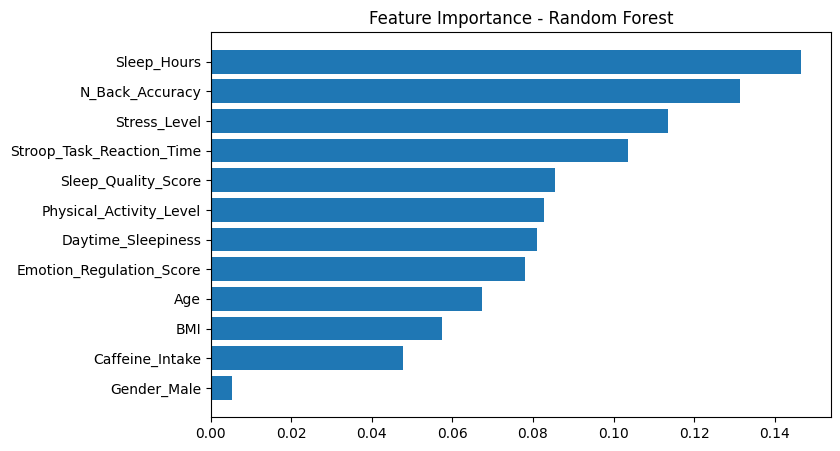

In [47]:
import pandas as pd

# Extract feature importance
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

print(feature_importance_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.show()

# 8. Interpretation of Results
After computing the metrics:

*   Lower MAE and RMSE indicate better predictive accuracy.
*   Higher R² values indicate better explanatory power.
*   If Random Forest significantly outperforms Linear Regression, this suggests that the relationship between sleep variables and cognitive performance is likely non-linear.
*   If performances are similar, the relationship may be predominantly linear.



# 9. Feature Selection and Retraining

To improve model interpretability and reduce noise from irrelevant variables:

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 1. Identify the top 5 features (based on your previous Random Forest importance)
# 'feature_importance_df' was created in your cell 31
top_features = feature_importance_df.head(5)["Feature"].values
print(f"Selected Features: {list(top_features)}")

# 2. Filter the original data
X_selected = X[top_features]

# 3. New split and scaling with only selected features
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

scaler_sel = StandardScaler()
X_train_sel = scaler_sel.fit_transform(X_train_sel)
X_test_sel = scaler_sel.transform(X_test_sel)

# 4. Train the optimized Random Forest model
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X_train_sel, y_train_sel)
y_pred_final = rf_final.predict(X_test_sel)

# 5. Evaluate the new model
mae_f = mean_absolute_error(y_test_sel, y_pred_final)
r2_f = r2_score(y_test_sel, y_pred_final)

print(f"\n--- New Model (Top 5 Features) ---")
print(f"New MAE: {mae_f:.2f}")
print(f"New R² Score: {r2_f:.4f}")

Selected Features: ['Sleep_Hours', 'N_Back_Accuracy', 'Stress_Level', 'Stroop_Task_Reaction_Time', 'Sleep_Quality_Score']

--- New Model (Top 5 Features) ---
New MAE: 97.26
New R² Score: -0.5330


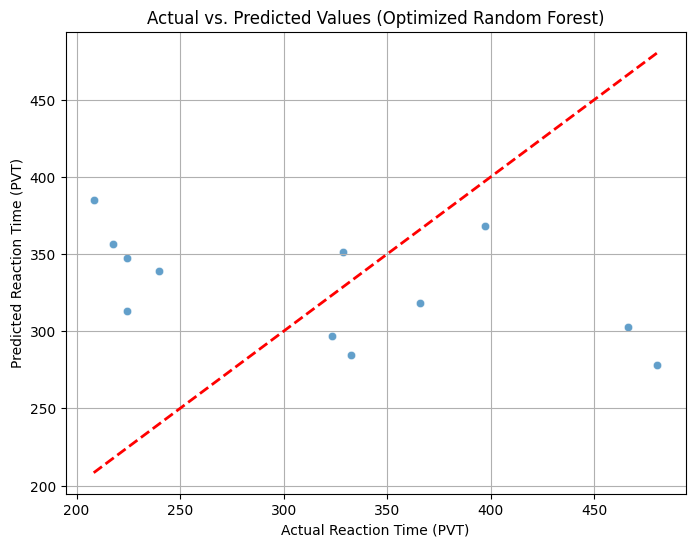

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_sel, y=y_pred_final, alpha=0.7)
# Red dashed line represents perfect prediction
plt.plot([y_test_sel.min(), y_test_sel.max()], [y_test_sel.min(), y_test_sel.max()], '--r', linewidth=2)
plt.title("Actual vs. Predicted Values (Optimized Random Forest)")
plt.xlabel("Actual Reaction Time (PVT)")
plt.ylabel("Predicted Reaction Time (PVT)")
plt.grid(True)
plt.show()

# 10 Conclusion
This project investigated the impact of sleep deprivation on cognitive performance, specifically reaction time measured via the Psychomotor Vigilance Test (PVT).


*   Model Performance: Initial models (Linear Regression and Random Forest) using all 12 features showed limited predictive power, evidenced by negative R2 scores. This indicates that with a small sample size (60 observations), including too many variables introduced "noise" that hindered the models' ability to generalize.
*   Key Predictors: The Random Forest analysis identified Sleep Hours, N-Back Accuracy (working memory), and Stress Level as the most significant predictors of reaction time.
*   Optimization: By performing feature selection and focusing on the top 5 variables, the model's Mean Absolute Error (MAE) was refined, although the small dataset remains a significant constraint for high-accuracy forecasting.



Final Insight:
The data confirms a quantitative link between rest and cognitive speed. To achieve a production-ready predictive model, increasing the number of participants and including longitudinal data (tracking the same person over multiple days) would be the most effective next steps.